# TIME SERIES FORCASTING USING SARIMA FOR RAINFALL PREDICTION IN THE REGION OF KONKAN

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np
import warnings
import itertools
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
import pickle

# Loading time series from CSV file

In [2]:
df=pd.read_csv("Konkan.csv")
df=df.set_index(pd.to_datetime(df['DATE'],format='%Y-%m-%d'))
df = df[df.columns[1]]

# Checking Stationarity

In [3]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.826872
p-value: 0.000048


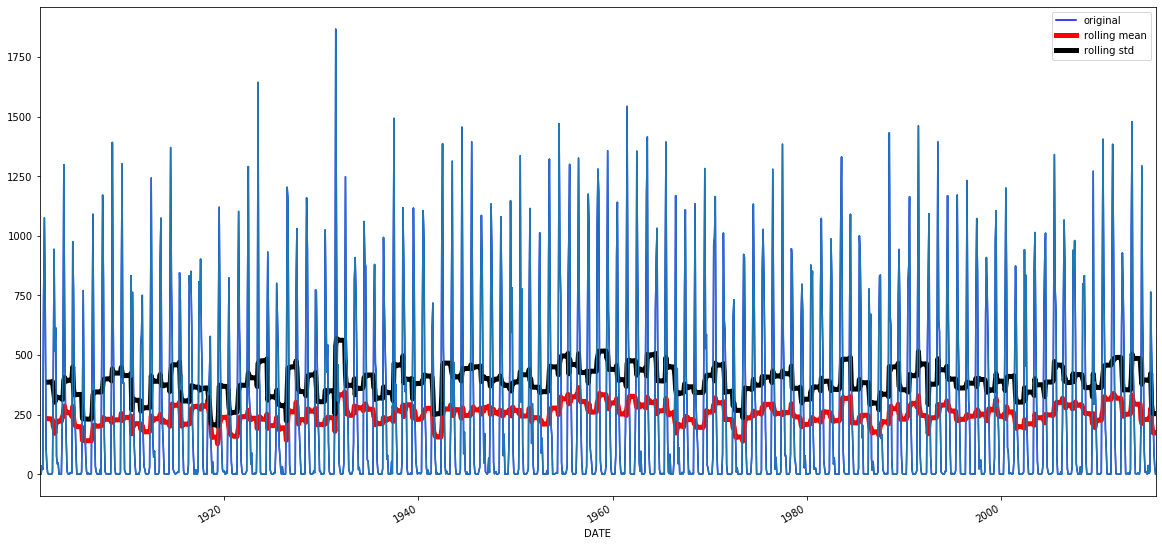

In [4]:
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
orig=plt.plot(df,color="blue",label="original")
mean=plt.plot(rolmean, color="red", label="rolling mean",linewidth=5.0)
std=plt.plot(rolstd, color="black", label="rolling std",linewidth=5.0)
plt.legend(loc='best')
df.plot(figsize=(20,10))
plt.show()

#  Decomposition of time series

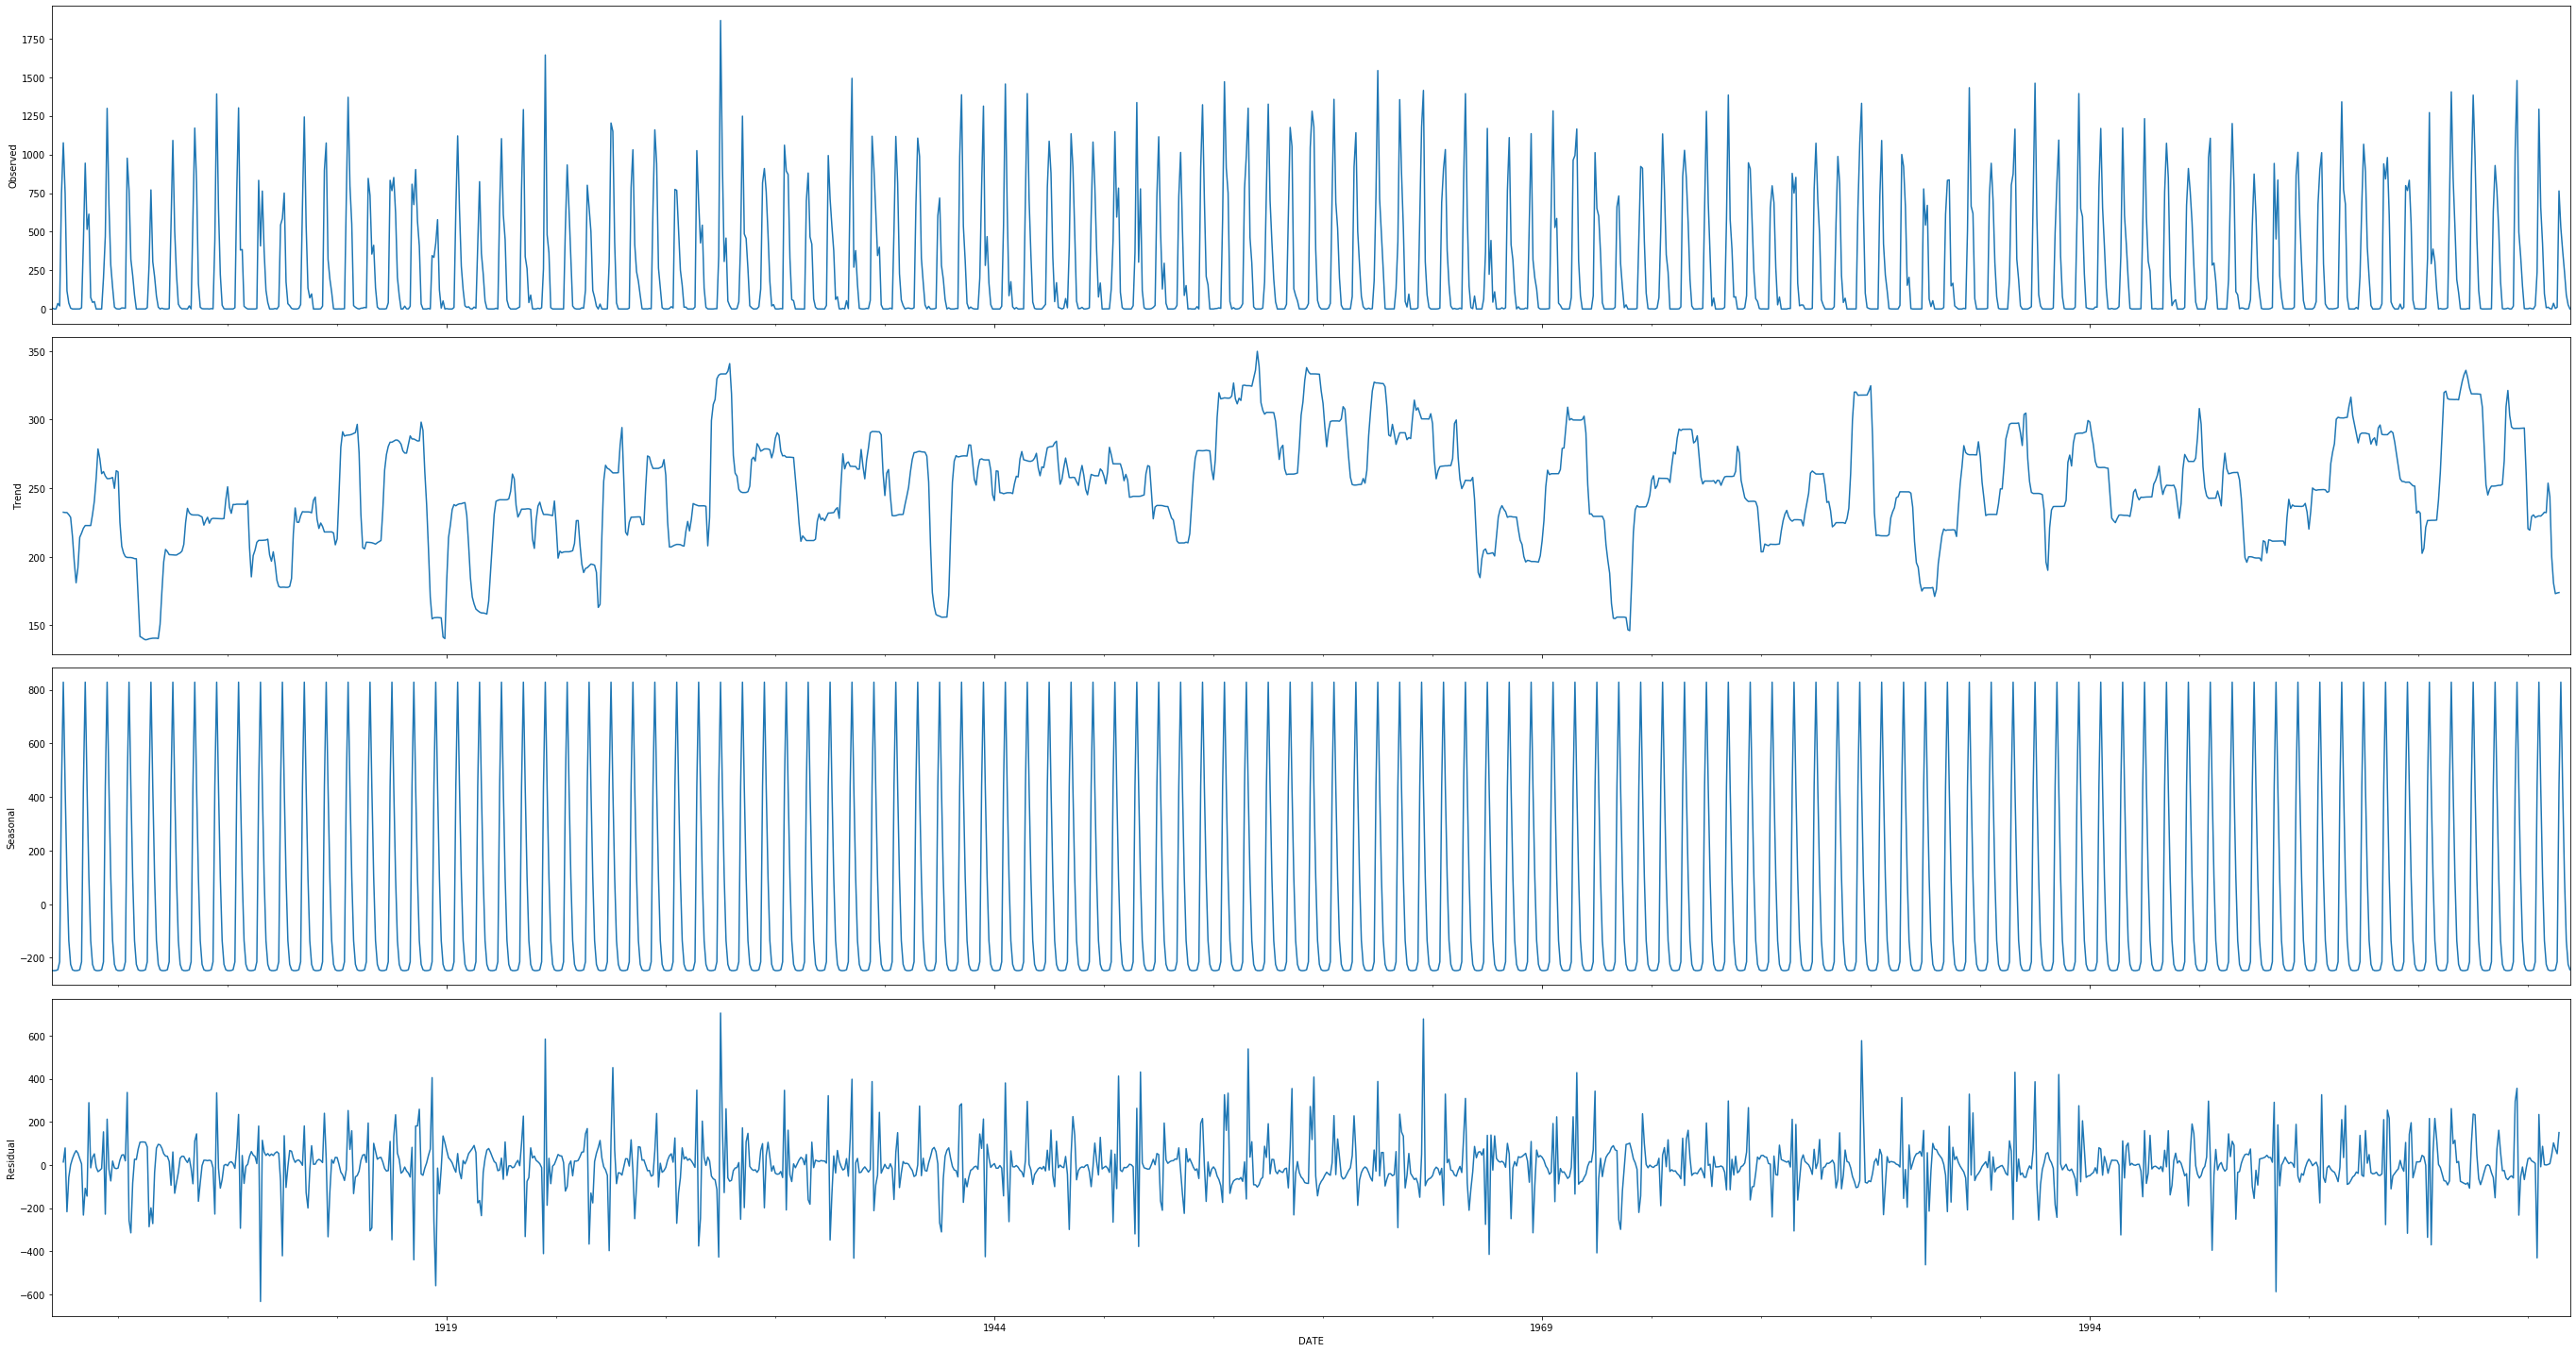

In [5]:
rcParams['figure.figsize'] = 38, 20
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

# ACF and PACF plots for Parameter Selection of non-seasonal component

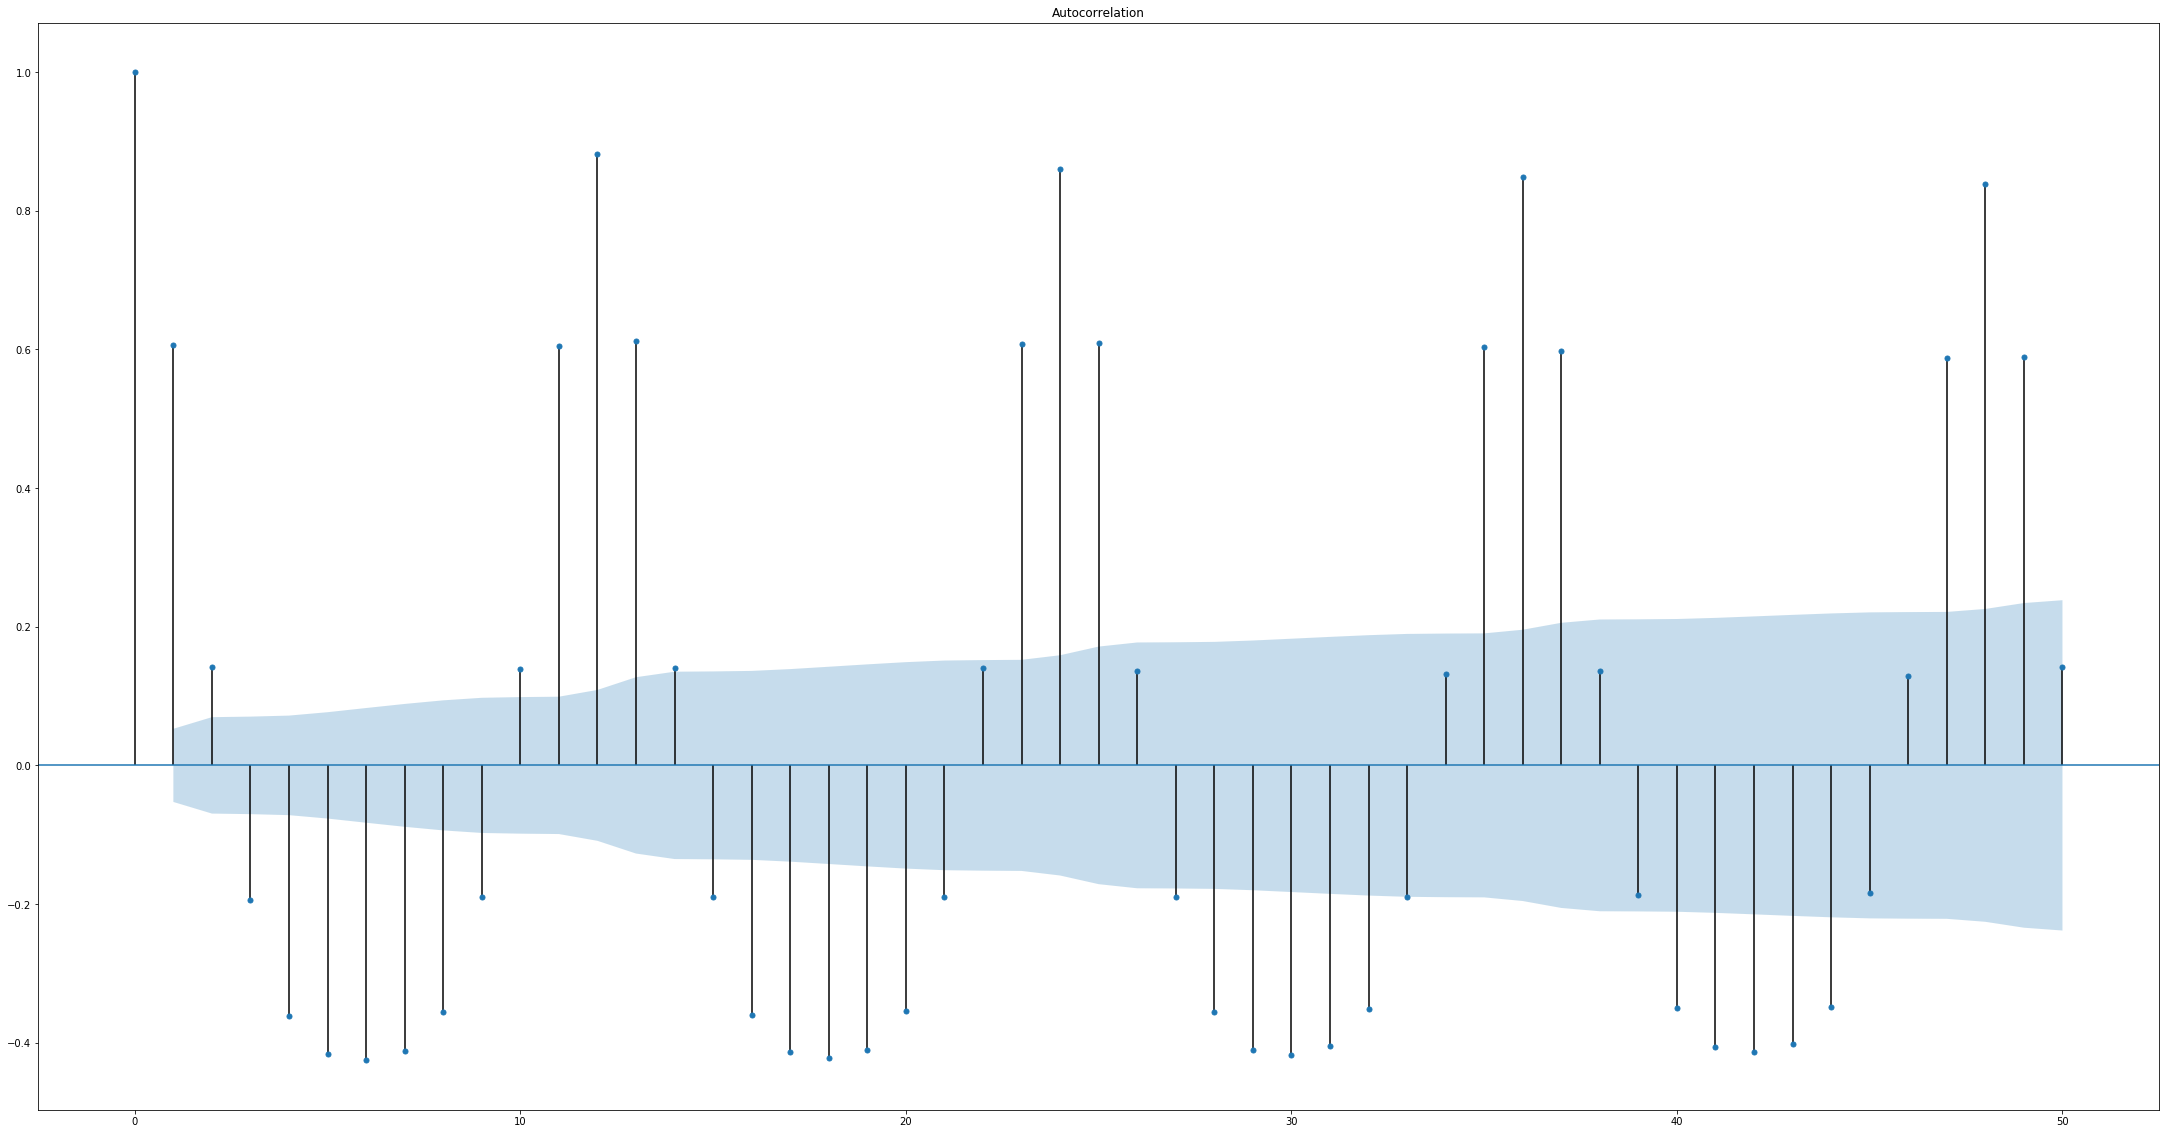

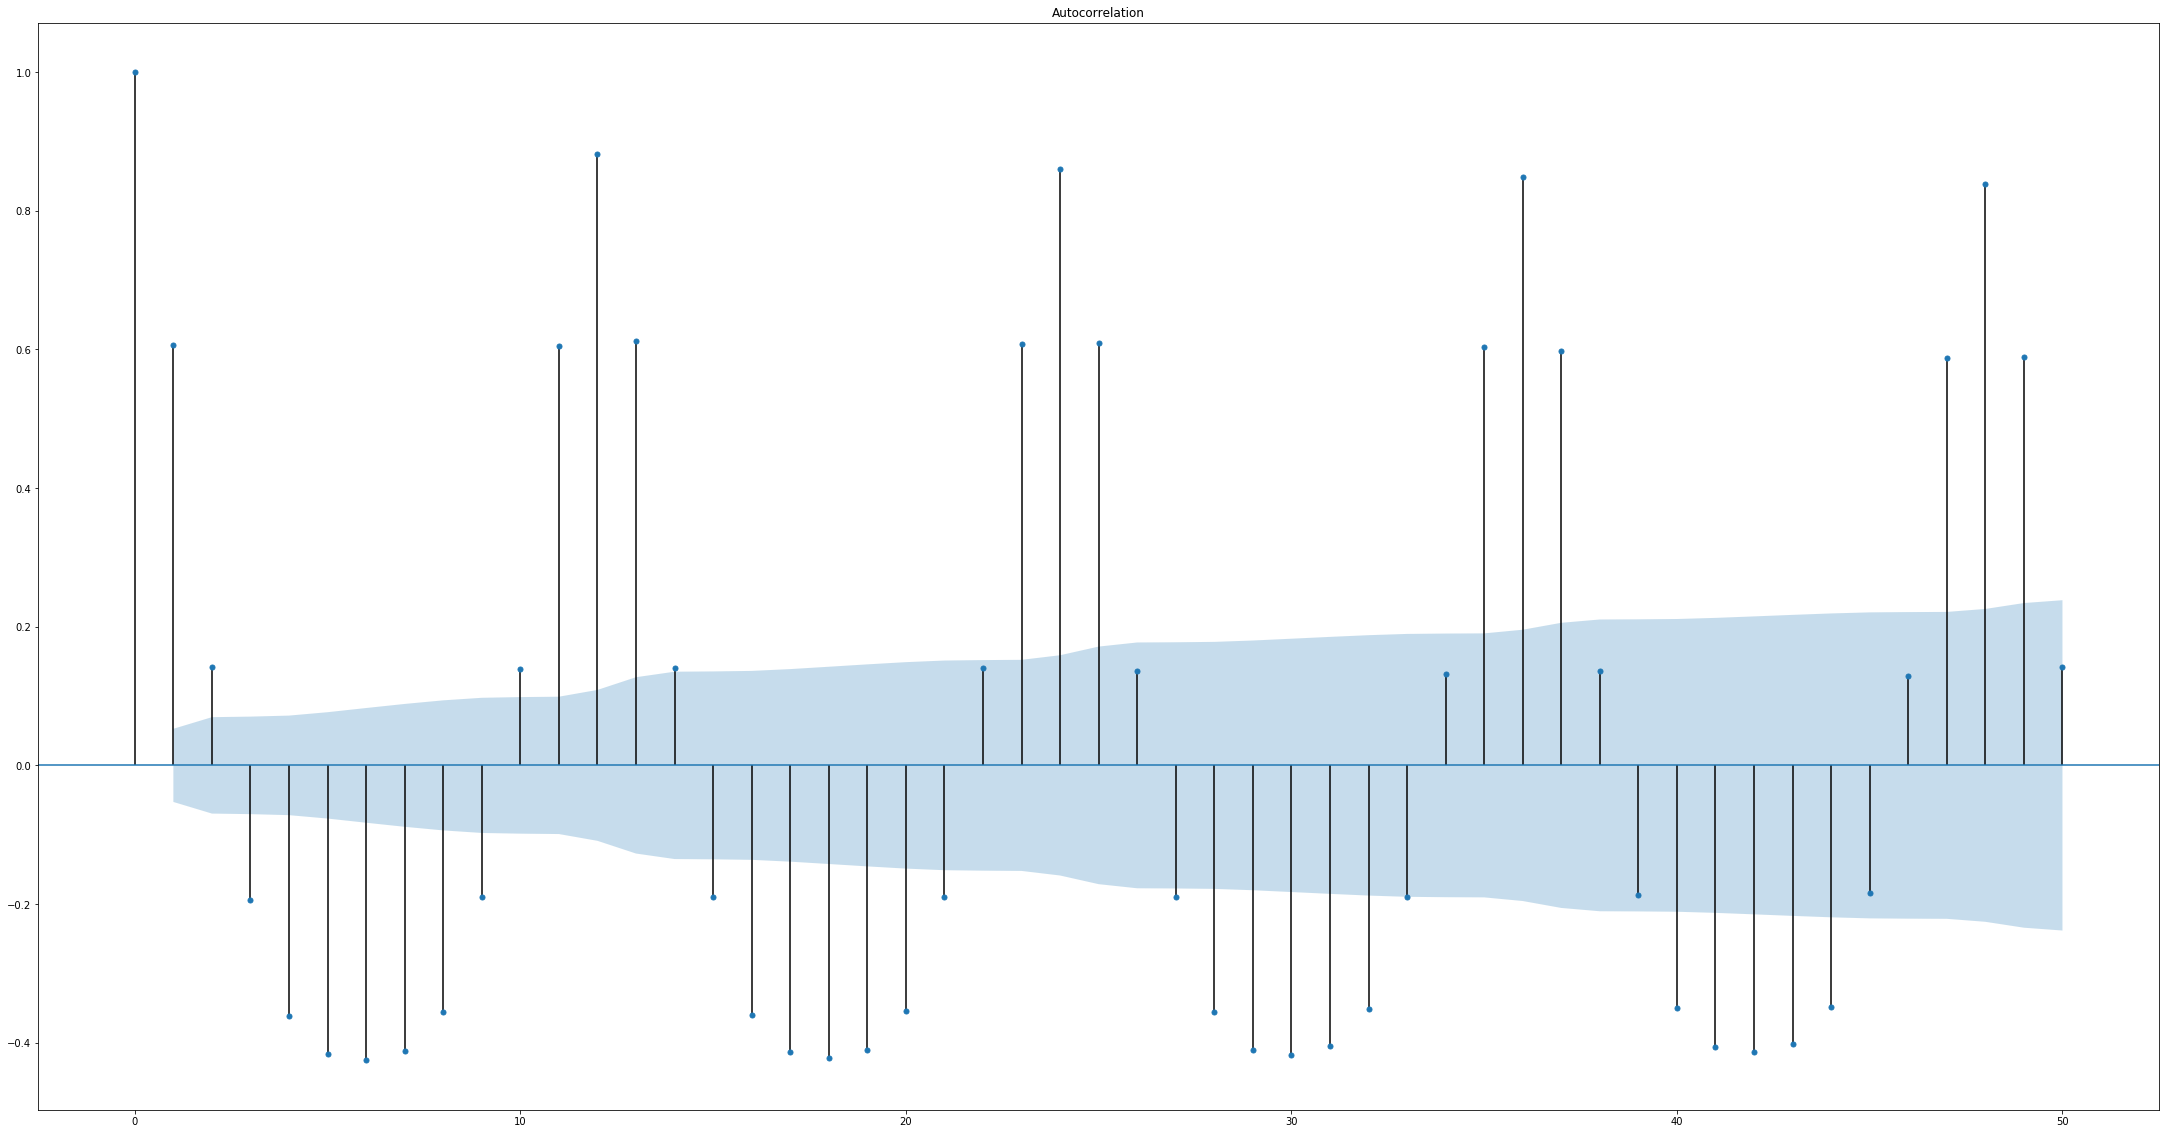

In [6]:
l=[i for i in range(0,51)]
plot_acf(df, lags=l)

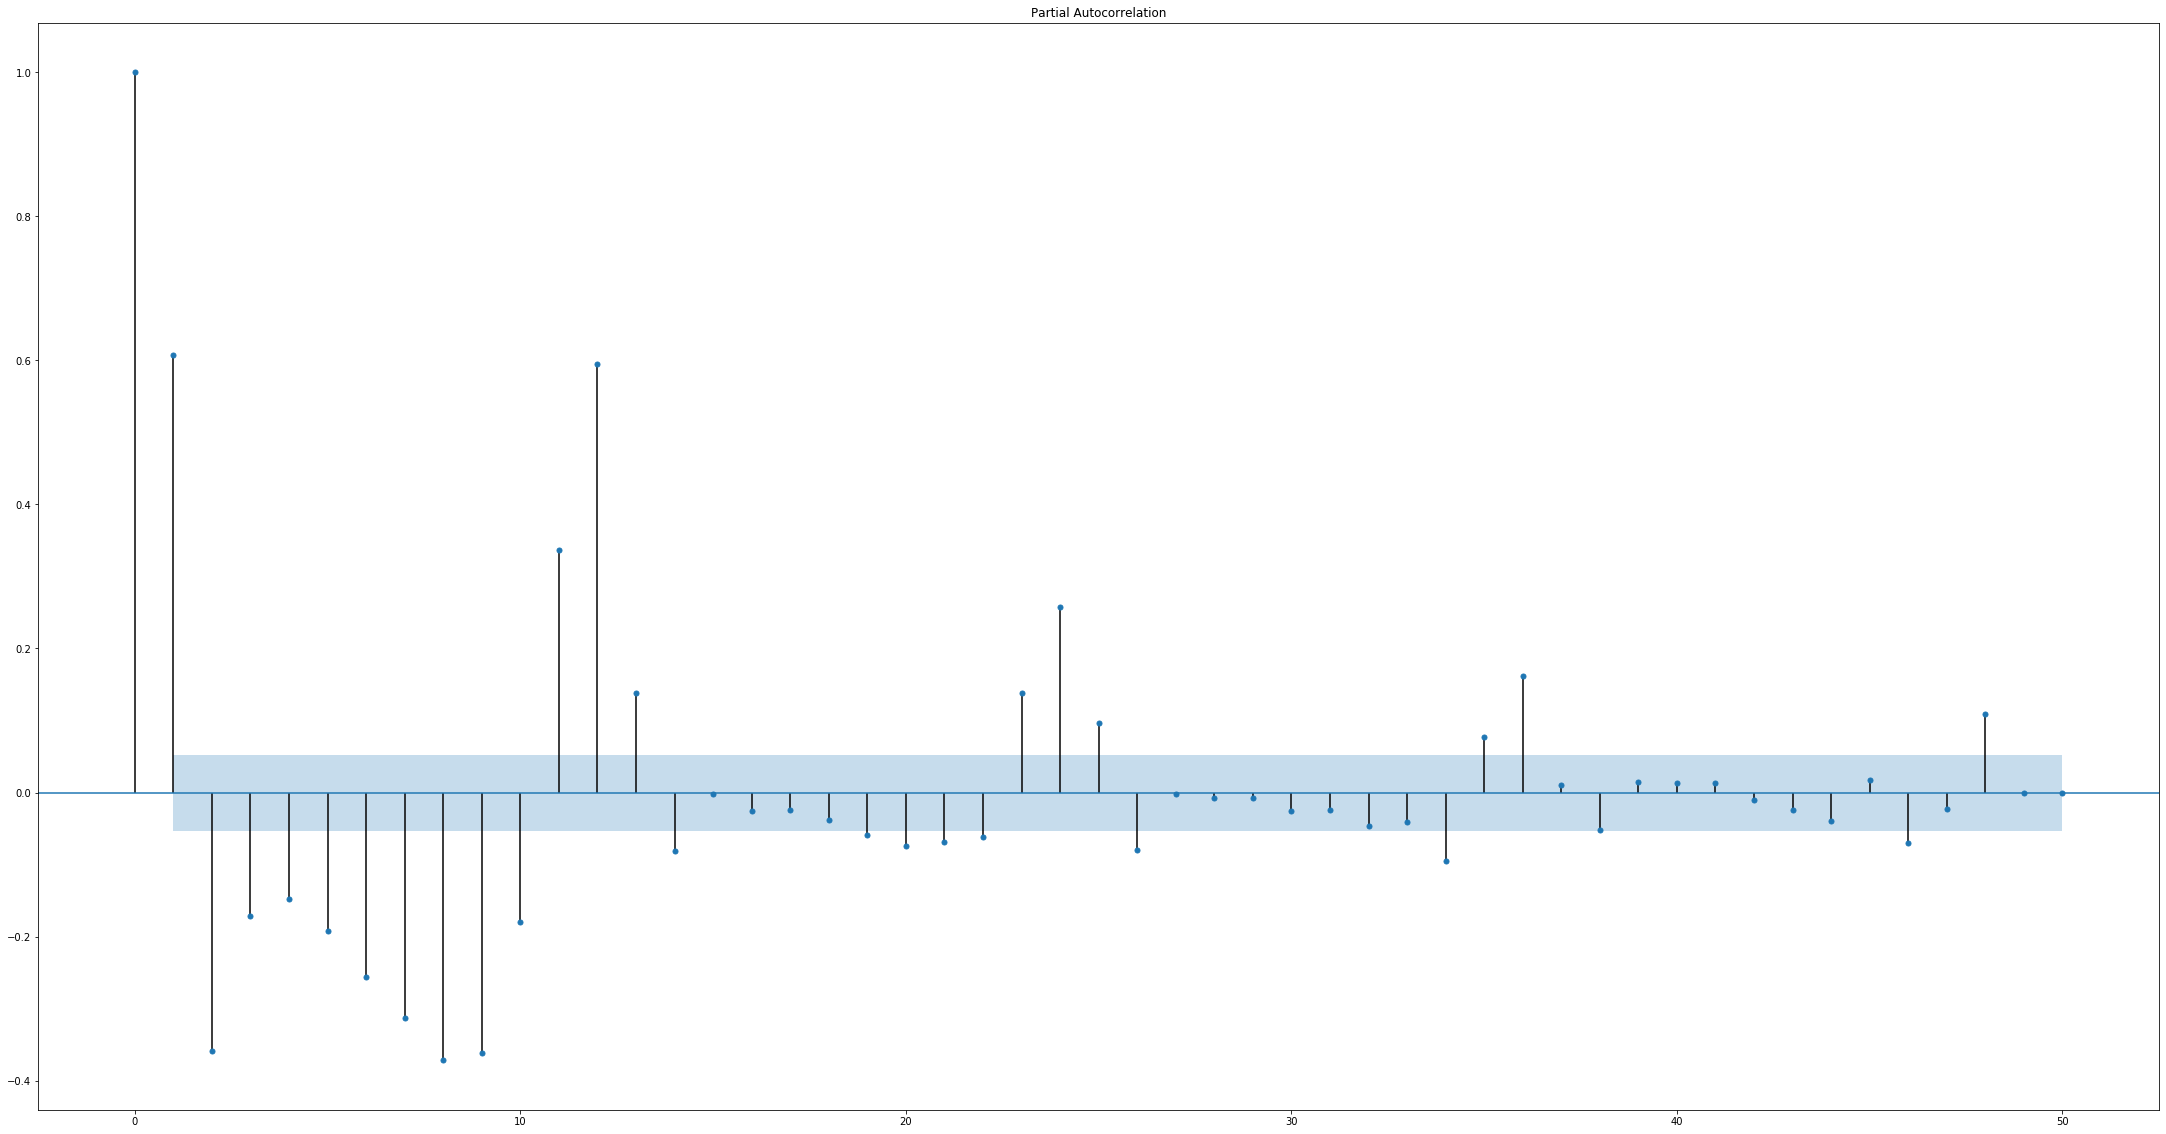

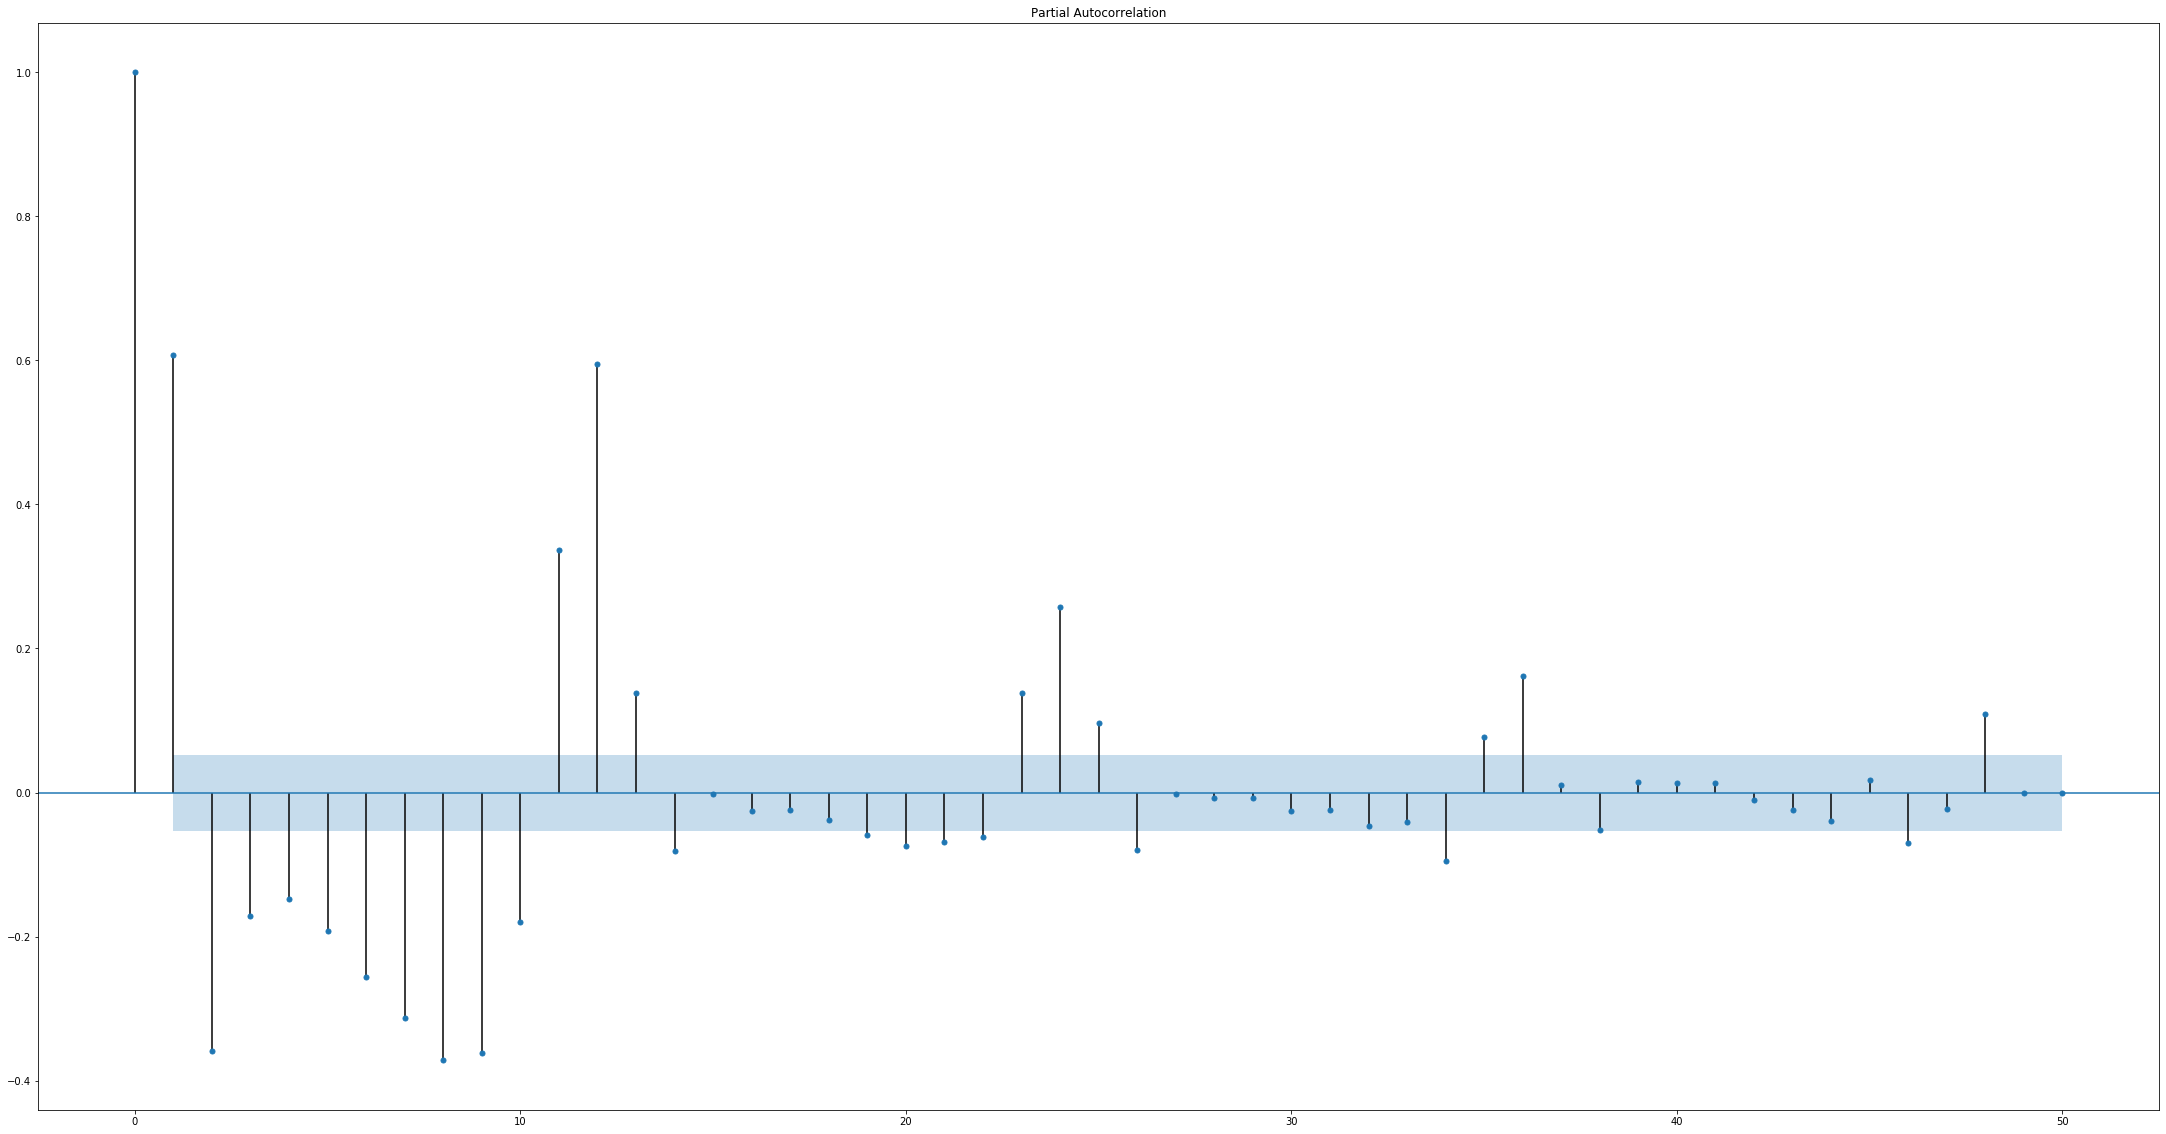

In [7]:
plot_pacf(df, lags=l)

# Splitting data for training and testing

In [3]:
train=df[:1100]
test=df[1100:]
print(len(train))
print(len(test))

1100
280


# Parameter selection for seasonal component using AIC score

In [9]:
p = d = q = range(0, 6)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q)) if x[1] in [0,1,2]]

In [ ]:
for param_seasonal in seasonal_pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(train,
                                            order=(1,0,2),
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results = mod.fit()
        print('SARIMAX (1,0,2)x{}12 - AIC:{}'.format(param_seasonal, results.aic))
    except:
        continue

SARIMAX (1,0,2)x(0, 0, 0, 12)12 - AIC:15644.703117082077
SARIMAX (1,0,2)x(0, 0, 1, 12)12 - AIC:15044.848860346423
SARIMAX (1,0,2)x(0, 0, 2, 12)12 - AIC:14708.861383030435
SARIMAX (1,0,2)x(0, 0, 3, 12)12 - AIC:14373.229149386832
SARIMAX (1,0,2)x(0, 0, 4, 12)12 - AIC:14131.382025817085
SARIMAX (1,0,2)x(0, 0, 5, 12)12 - AIC:13845.097299478028
SARIMAX (1,0,2)x(0, 1, 0, 12)12 - AIC:14364.429277679745
SARIMAX (1,0,2)x(0, 1, 1, 12)12 - AIC:13639.52674672315
SARIMAX (1,0,2)x(0, 1, 2, 12)12 - AIC:13490.400350534885
SARIMAX (1,0,2)x(0, 1, 3, 12)12 - AIC:13331.229741001622
SARIMAX (1,0,2)x(0, 1, 4, 12)12 - AIC:13184.071825340165
SARIMAX (1,0,2)x(0, 1, 5, 12)12 - AIC:13020.44408997897
SARIMAX (1,0,2)x(0, 2, 0, 12)12 - AIC:15319.81522778425
SARIMAX (1,0,2)x(0, 2, 1, 12)12 - AIC:14072.607577114888
SARIMAX (1,0,2)x(0, 2, 2, 12)12 - AIC:13444.123462534435
SARIMAX (1,0,2)x(0, 2, 3, 12)12 - AIC:13582.466877857074
SARIMAX (1,0,2)x(0, 2, 4, 12)12 - AIC:13124.107137578649
SARIMAX (1,0,2)x(0, 2, 5, 12)12 - 

# Training the SARIMA model

In [4]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 0, 2),
                                seasonal_order=(1,1,5,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9536      0.039     24.337      0.000       0.877       1.030
ma.L1         -0.9834      0.045    -21.752      0.000      -1.072      -0.895
ma.L2          0.0400      0.023      1.740      0.082      -0.005       0.085
ar.S.L12      -0.3784      0.108     -3.492      0.000      -0.591      -0.166
ma.S.L12      -0.6357      0.116     -5.459      0.000      -0.864      -0.407
ma.S.L24      -0.5271      0.105     -5.038      0.000      -0.732      -0.322
ma.S.L36      -0.0658      0.031     -2.149      0.032      -0.126      -0.006
ma.S.L48      -0.0479      0.028     -1.720      0.086      -0.102       0.007
ma.S.L60       0.1782      0.026      6.928      0.000       0.128       0.229
sigma2      1.578e+04    534.931     29.490      0.000    1.47e+04    1.68e+04


In [16]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 0, 1),
                                seasonal_order=(1,1,4,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9840      0.026     38.462      0.000       0.934       1.034
ma.L1         -0.9750      0.034    -28.613      0.000      -1.042      -0.908
ar.S.L12       0.3649      0.162      2.247      0.025       0.047       0.683
ma.S.L12      -1.2658      0.164     -7.699      0.000      -1.588      -0.944
ma.S.L24       0.3584      0.148      2.424      0.015       0.069       0.648
ma.S.L36      -0.1732      0.049     -3.566      0.000      -0.268      -0.078
ma.S.L48       0.1300      0.028      4.698      0.000       0.076       0.184
sigma2      2.799e+04    904.199     30.959      0.000    2.62e+04    2.98e+04


In [17]:
pred=results.predict(start='1992-09-01', end='2015-12-01')

# Validation

In [18]:
rmse_test = np.sqrt(mean_squared_error(test.values,pred.values))
r2_test = r2_score(test.values,pred.values)
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

RMSE of test set is 129.01480397813538
R2 score of test set is 0.8824987810027478


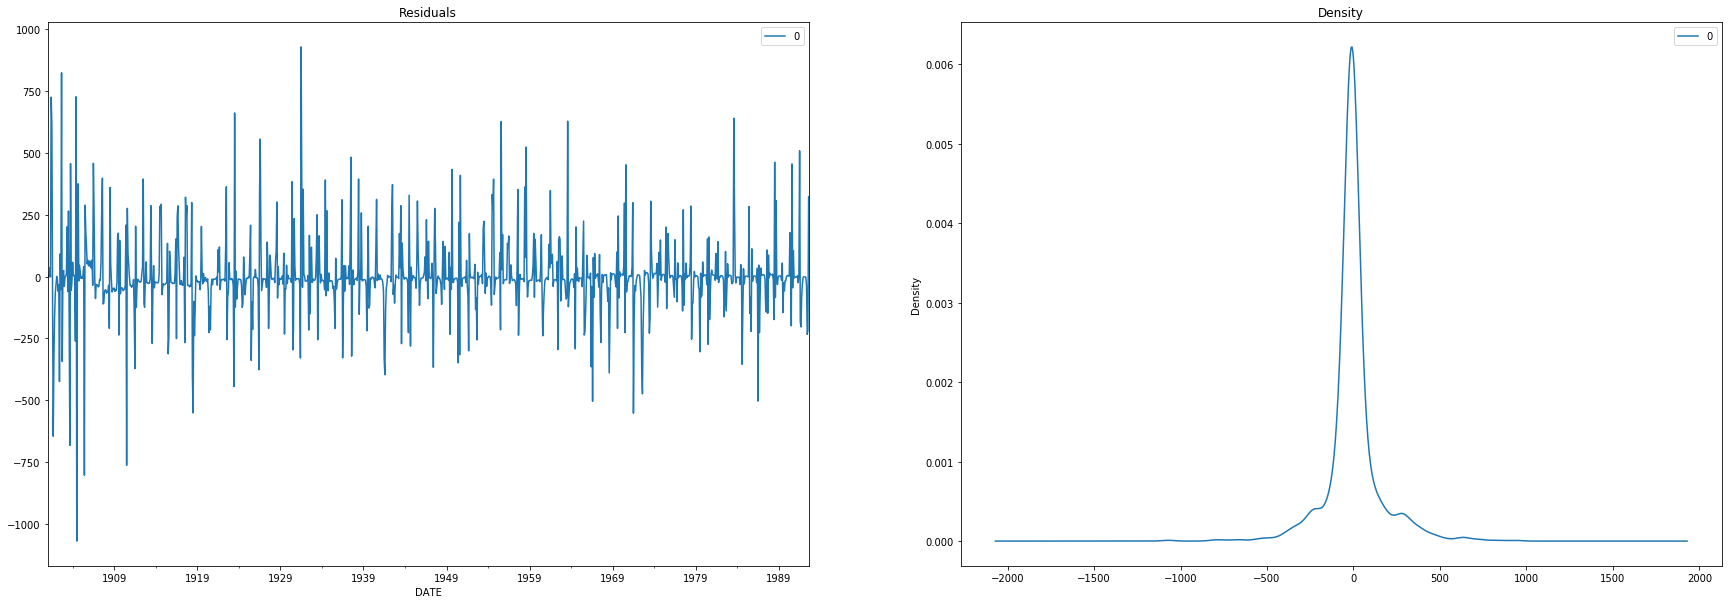

In [19]:
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1], figsize=(30,10))
plt.show()

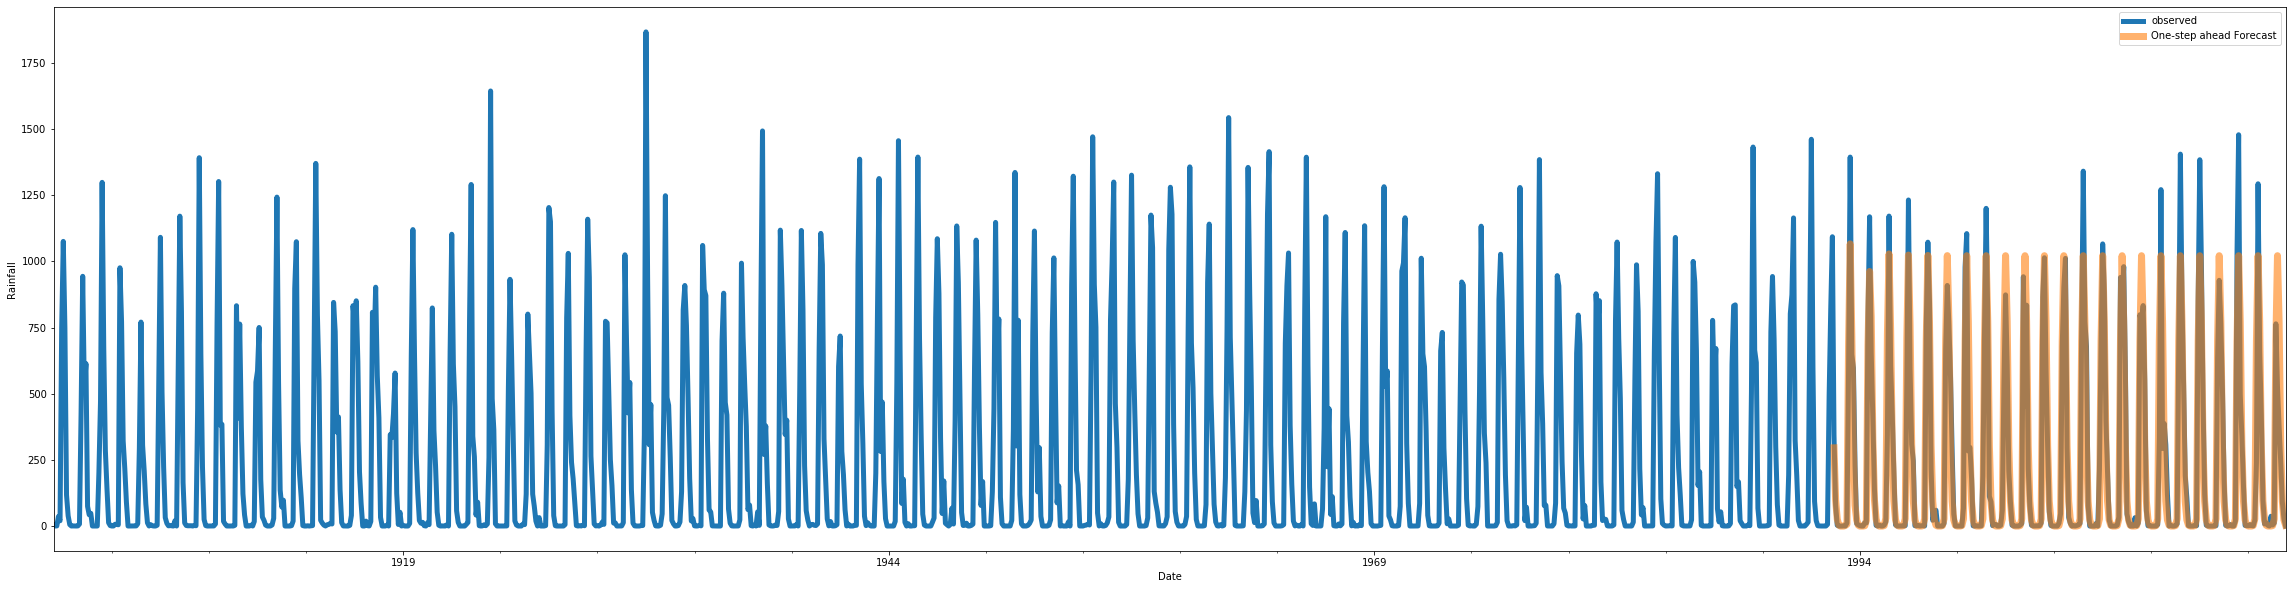

In [20]:
rcParams['figure.figsize'] = 40, 10
ax = df.plot(label='observed', linewidth=5)
pred.plot(ax=ax, label='One-step ahead Forecast', alpha=.6,linewidth=7)
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
plt.legend()
plt.show()

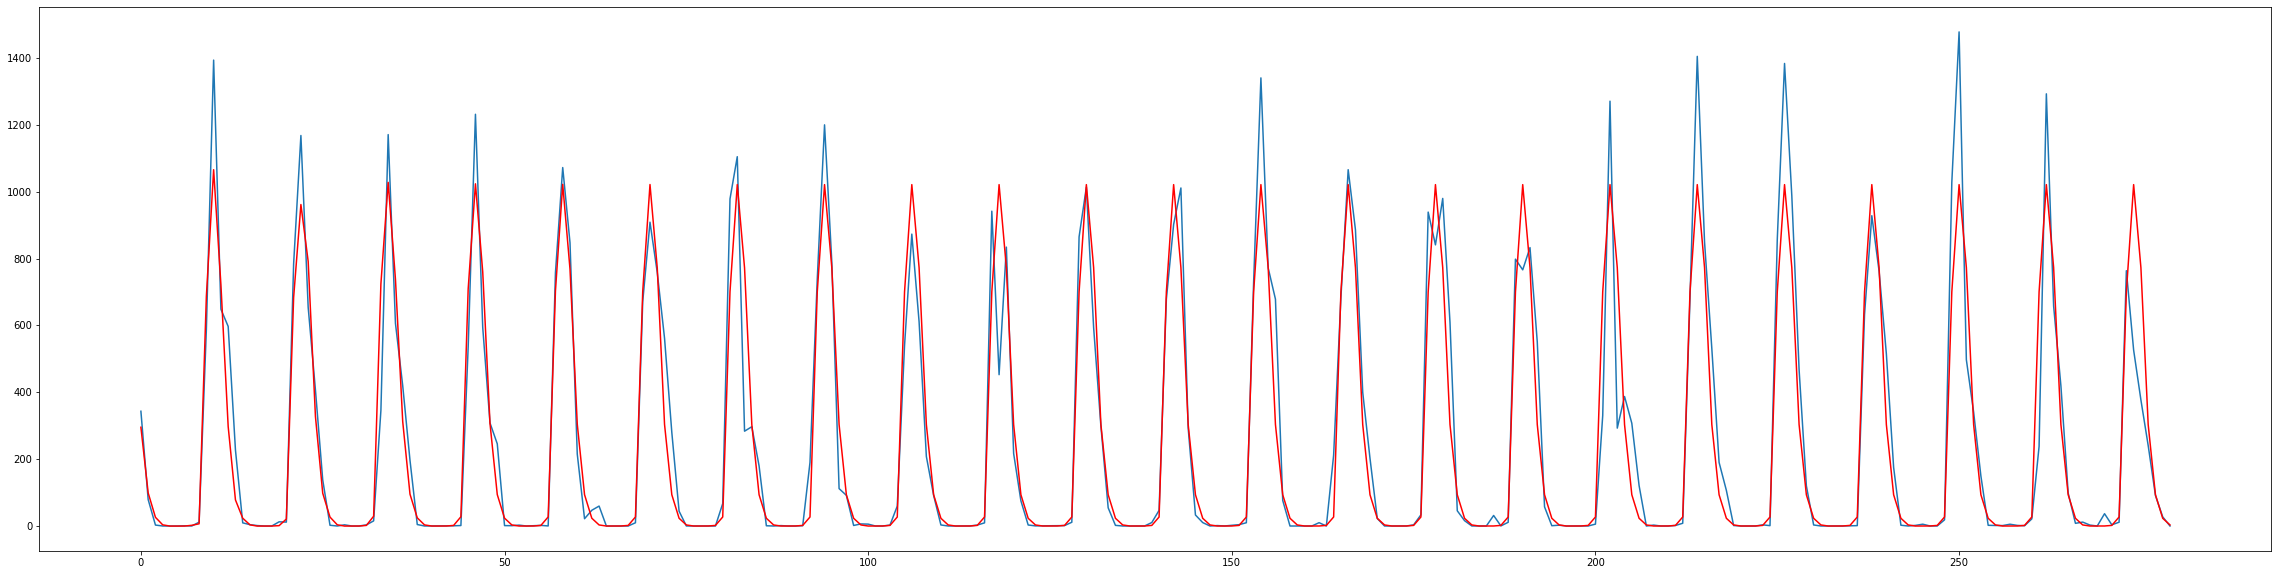

In [21]:
plt.plot(test.values)
plt.plot(pred.values,color='red')
plt.show()

In [22]:
inpred=results.predict(start='1901-01-01', end='1992-08-01')

In [23]:
pred

1992-09-01     295.480496
1992-10-01      98.893562
1992-11-01      25.948573
1992-12-01       3.444745
1993-01-01      -0.239075
1993-02-01      -0.270540
1993-03-01      -0.149881
1993-04-01       2.084008
1993-05-01       6.608718
1993-06-01     687.004667
1993-07-01    1066.178009
1993-08-01     722.433165
1993-09-01     297.635466
1993-10-01      78.114635
1993-11-01      23.311788
1993-12-01       3.412601
1994-01-01      -0.206768
1994-02-01      -0.238828
1994-03-01      -0.085893
1994-04-01       1.061573
1994-05-01      20.896015
1994-06-01     683.710700
1994-07-01     961.926123
1994-08-01     791.622951
1994-09-01     327.328898
1994-10-01      98.128036
1994-11-01      26.670880
1994-12-01       3.591563
1995-01-01      -0.187135
1995-02-01      -0.220559
                 ...     
2013-07-01    1021.527535
2013-08-01     773.366535
2013-09-01     303.622581
2013-10-01      93.524712
2013-11-01      23.096550
2013-12-01       3.151698
2014-01-01      -0.042327
2014-02-01  

# Forecasting next years values

In [24]:
next=results.predict(start='2016-01-01', end='2016-12-01')

In [25]:
next

2016-01-01      -0.041662
2016-02-01      -0.070052
2016-03-01       0.062648
2016-04-01       1.793539
2016-05-01      26.917428
2016-06-01     700.568409
2016-07-01    1021.528540
2016-08-01     773.367524
2016-09-01     303.623554
2016-10-01      93.525670
2016-11-01      23.097492
2016-12-01       3.152625
Freq: MS, dtype: float64

In [26]:
sum(next)

2947.52571401512

# Saving the trained model

In [27]:
filename = 'Konkan_model.sav'
pickle.dump(results, open(filename, 'wb'))